In [ ]:
# some tehcnicalities for working on the campus computers
import os

import sys
sys.path.append(r'R:/JoePriceResearch/Python/Anaconda3/Lib/site-packages')

In [81]:
import re

import pandas as pd # getting the data
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

seed = 17

In [82]:
df = pd.read_csv('ICPSR_04572/DS0001/04572-0001-Data.tsv', sep='\t')
df2 = pd.read_csv('ICPSR_04572/DS0002/04572-0002-Data.tsv', sep='\t')
print('first part shape:',df.shape)
print('second part shape:',df2.shape)
print(all(df2.columns == df.columns))
df = df.append(df2)
print('all together shape:',df.shape)
df.head()

first part shape: (3686, 3374)
second part shape: (14499, 3374)
True
all together shape: (18185, 3374)


,V0001,V0002,V0003,V0004,V0005,V0006,V0007,V0008,V0009,V0010,...,CS_INCDA,CS_INCJ,CS_INCA,CH_NUMCAR,CH_NUMCAR1,CH_NUMCAR2,CH_NUMCAR3,CH_NUMCAR4,CH_NUMCAR5,CH_CRIM_HISTORY
0,15717,10,201,2,2,0,5,10,215,99,...,0,0,0,0,1,1,1,1,1,2
1,15718,10,201,2,2,0,5,8,310,99,...,0,0,0,0,1,1,1,1,1,2
2,15719,10,201,2,2,0,5,2,145,99,...,0,0,0,0,1,1,1,1,1,2
3,15720,10,201,2,2,0,5,6,150,99,...,0,0,0,0,1,1,1,1,1,2
4,15721,10,201,2,2,0,4,11,183,99,...,0,0,1,1,2,1,2,2,2,1


We need to clean up some variables that we will be using as outcomes and things that come as a direct result like disciplinary action

In [83]:
# this block has the violations and discipline
discipline_cols = [f'V{i}' for i in range(2500, 2565)]
discipline = df[discipline_cols]
df.drop(columns=discipline_cols, inplace=True)
df.drop(columns='V2650', inplace=True)

In [97]:
# renaming target variables
targets = {# 'v2517':'breaking_rules', ### FIXME: This one isn't working for some reason
'V2518':'drugs',
'V2519':'n_drugs',
'V2520':'alcohol',
'V2521':'n_alcohol',
'V2522':'weapon_poss',
'V2523':'n_reapon_poss',
'V2524':'stolen_prop',
'V2525':'n_stolen_prop',
'V2526':'poss_unauth',
'V2527':'n_poss_unauth',
'V2528':'verbal_staff',
'V2527':'n_verbal_staff',
'V2530':'phys_staff',
'V2531':'n_phys_staff',
'V2532':'verb_inmate',
'V2533':'n_verb_inmate',
'V2534':'phys_inmate',
'V2535':'n_phys_inmate',
'V2536':'att_escape',
'V2537':'n_att_escape',
'V2538':'out_place',
'V2539':'n_out_place',
'V2540':'disobey_ord',
'V2541':'n_disobey_ord',
'V2542':'maj_violation',
'V2543':'n_maj_violation',
'V2544':'minor_violation',
'V2545':'n_minor_violation',
'V2546':'other_violation',
'V2547':'n_other_violation',
'V2549':'recent_violations',
}
discipline.rename(mapper=targets, axis='columns', inplace=True)

/Users/branchflower/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [46]:
df['V0052'].value_counts()

9    17825
1      284
2       34
7       31
8       11
Name: V0052, dtype: int64

In [78]:
df['plea'].value_counts()

1.0    17907
Name: plea, dtype: int64

In [ ]:
varnames = {'V0001':'id','V00014':'age','V0019':'hispanic','V0037':'white','V0038':'black',
            'V0039':'native_american','V0040':'asian','V0041':'pacfic_islander',
            'V0042':'other_race','V0043':'unknown_race','V0046':'born_us',
            'V0058':'marital_status','V0059':'military_service','V0079':'time_mil_service',
            'V0083':'corrently_sentenced','V0084':'crim_stat_arrest','V0085':'wait_judicial_res',
            'V0086':'wait_trial','V0087':'wait_parole','V0088':'judge_informed_time',
            'V0089':'crim_stat_last_arrest','V0090':'held_other_authorities','V0091':'held_safekeeping',
            'V0092':'held_other_reason',
            # use offense codes for replacement to get categories of crimes
                # 94,96,98,100,102 previous holding offenses
                # 95,97,999,101,103 number of charges for said offenses
                # 115,117,119,121,123 current holding offenses
                # 116,118,120,122,124
            'V0125':'arrest_month','V0127':'arrest_year',
            'V0638':'crim_just_status',
            # 639 - : pleas and trial info
           }
df.rename(mapper=varnames, axis='columns', inplace=True)

In [84]:
df['height'] = [(x * 12) if x < 90 else np.nan for x in df['V0007']]
df['V0008'] = [y if y < 97 else 0 for y in df['V0008']]
df['height'] = [x + y if y < 13 else y for x, y in zip(df['height'], df['V0008'])]

In [85]:
df['plea'] = df['V0639'].replace(99,np.nan).fillna(df['V0640'].replace([99,2],[np.nan,1])).fillna(df['V0641'].replace([99,3],[np.nan,1])).fillna(df['V0642'].replace([99,4],[np.nan,1])).fillna(df['V0643'].replace([99,5],[np.nan,1]))
df['found_guilty'] = df['V0647'].replace([2,7,8,9],[0,np.nan,np.nan,np.nan])

In [88]:
drop_list = [3,4,6,10,11,12,13,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,44,45,47,48,
49,50,51,52,53,54,55,56,57,60,61,62,63,64,65,66,67,68,69,70,71,71,72,73,74,75,76,77,78,80,81,
82, 639,640,641,642,643]
more_drops = [x for x in range(150,638)]
drop_list.extend(more_drops)
df.drop(["V{:04}".format(x) for x in drop_list], axis='columns')
# 20-26 clarify hispaninc origin
# 51,52 has citizenship info but too much was missing to be worth using
# 60 - 66 clarify military service
# 82 has discharge type for military
# 104 - 114 previous arrest dates too many missing to be useful
# 123-149 time of arrest, admission and release variables
# 150 - 637 previous prison sentences undr other circumstances like parole violations and such
    # 150-166 parole revocation info
    # 167-190 parole readmission and release info
# 559 days spent escaped
print(f'Down to {df.shape[1]} columns')

Down to 3311 columns


In [53]:
# classify types of offenses 'V{}'.format(, '')
offense_codes = {'homicide':[10,11,12,13,14],
 'manslaughter':[15,16,20,21,22,30,31,32],
 'kidnapping':[40,41,42],
 'rape':[50,51,52,60,61,62],
 'sexual assault':[70,71,72,80,81,82],
 'armed robbery':[90,91,92],
 'unarmed robbery':[100,101,102],
 'sodomy':[110,111,112],
 'assault':[120,121,122,130,131,132,140,141,142],
 'extortion':[150,151,152],
 'hit and run':[160,161,612,300],
 'child abuse':[170,171,172],
 'other violence':[180],
 'burglary':[190,191,192],
 'arson':[200,201,202],
 'auto theft':[210,211,212],
 'fraud, embezzlement, bribery':[220,221,222,260,261,262,673,674,675,800,810,820,830,860],
 'larceny':[230,231,232,240,241,242,250,251,252],
 'trafficking stolen property':[270,271,272,280,281,282],
 'destruction of property':[290,291,292],
 'unauthorized vehicle':[310,311,312],
 'trespassing':[320,321,322],
 'other property offense':[330,331,332],
 'drug trafficking':[340,341,342,350,351,352,360,361,362,370,371,372],
 'drog posession/use':[380,381,382,385,286,387,390,391,392,400,401,402,410,420,425,430,440,450],
 'escape':[460,461,462,470,471,472],
 'weapon offense':[480,481,482],
 'parole/probation violation':[490,500],
 'rioting':[510,511,512],
 'habitual':[520],
 'other':[530,580,630,650,670,671,672,660,690,691,692,700,710,840,880,870],
 'court offense':[540,541,542],
 'traffic violations':[550,560,565,570],
 'decency offenses':[590,600],
 'immigration':[610],
 'ubstruction of law':[620,621,622],
 'vice':[640],
 'juvenile':[680],
 'tax':[850]}

occupation_codes = {
    'managerial position':[1,2,4,5,10,11,12,13,14,15,16,20,21,22,23,30,
                           31,32,33,34,35,36,40,41,42,43],
    'business operations':[50,52,53,54,56,60,62,70,71,72,73,80,81,82,83,
                           84,85,86,91,93,94,95],
    'CS and Math':[100,101,102,104,106,110,111,122],
    'Architecture and engineering':[130,131,134,136,140,141,142,143,146,
                                    153,154,155,156],
    'life,physical,social science':[160,172,174,176,181,182,186,192,193,196],
    'community and social services':[200,201,202,204,206],
    'legal':[210,211,214,215],
    'education':[220,230,232,233,234,240,243,244,254,255],
    'enetertainment':[160,263,270,271,272,274,275,276,280,282,283,285,286,290,291,292],
    'health':[303,305,306,313,316,324,325,330,332,340,341,350,351,352,353,354,
    360,361,362,363,364,365],
    'protective services':[370,371,372,373,374,380,382,385,390,391,392,394,395],
    'food prep':[400,401,402,403,404,405,406,411,412,413,414,415,416],
    'maintenance':[420,421,422,423,424,425,700,701,702,703,704,710,711,712,713,714,715,
    716,720,721,722,724,726,731,732,733,734,735,736,741,742,743,751,752,
    754,755,756,760,761,762],
    'personal care and service':[430,432,434,435,440,442,443,446,450,451,
                                 452,453,454,455,460,461,462,464,465],
    'sales':[470,471,472,474,475,476,480,481,482,483,484,485,490,492,494,495,496],
    'administrative support':[500,501,502,503,510,511,512,513,514,516,520,522,523,524,526,530,532,
    532,533,535,536,540,541,542,551,552,553,554,555,556,560,561,562,563,
    570,580,581,582,583,584,585,586,590,591,593],
    'farm fish forest':[600,601,602,604,605,610,612,613],
    'construction':[620,621,622,623,624,625,626,630,631,632,633,635,636,640,642,643,644,
    646,650,651,652,653,660,666,670,671,672,673,674,675,676,680,682,683,684,
    692,693,694],
    'production':[770,771,772,773,774,775,780,781,783,784,785,790,792,793,795,796,
    800,801,802,803,804,810,813,814,815,816,820,821,822,823,824,825,826,
    830,831,832,833,834,835,840,841,842,845,846,850,851,952,853,854,855,
    860,861,862,863,864,865,871,872,873,874,875,876,880,881,883,890,891,
    892,893,895,896],
    'transportation':[900,903,904,911,912,913,914,915,920,923,924,926,930,931,933,935,936,
    941,942,951,952,956,960,961,962,963,964,965,972,974,975],
    'military':[980,981,982,983]
}

In [92]:
offense_vars = [94,96,98,100,102,115,117,119,121,123]
for c in ["V{:04}".format(x) for x in offense_vars]:
    for x, y in offense_codes.items():
        df[c] = df[c].replace(y, x)

In [ ]:
# interesting variable ranges to potentially look at
# 

In [76]:
nan_list = [99, 999, 9999, 9999.99, 99999, 99999.99, 999999, 999999.99,9999999,9999999.99,
            99999999, 99999999.99, 9999999.98,9999998.00, 9999999.98, 9999998.00, 9999997.00]
df.replace(nan_list, np.nan, inplace=True)
for c in ['V1057', 'V1061']:
    df[c] = df[c].replace(['97','98','99'], np.nan)
# FIXME: need to change some values to 0
#for c in df.columns:
#    if set(df[c]).issubset({1,2,7,8,9}):
#        df[c] = df[c].replace([7,8,9], np.nan)
df.dropna(axis='columns', how='all', inplace=True)

We don't have time of infractions. Or the security level/ punishment. 

In [98]:
y = discipline.loc[:,targets.values()]
y.rename(mapper=targets, axis='columns', inplace=True)

In [100]:
y_cat = discipline.loc[:,[c for c in targets.values() if not re.search(r'^n_.*', c) and not c == 'recent_violations']]

In [101]:
y_num = discipline.loc[:,[c for c in targets.values() if re.search(r'^n_.*', c) or c == 'recent_violations']]

In [102]:
for c in y_cat.columns:
    y[c] = y[c].replace([9,8,7,2],[np.nan,np.nan,np.nan,0])
for c in y_num.columns:
    y[c] = y[c].replace([97,98,9],np.nan)
violator = y_cat.max(axis='columns')

In [220]:
df.shape

(18185, 3374)

Our targets will be drug violations, assault on staff, assault on inmates, attempt to escape, other violations and the most recent violation.

We have an incredible number of possible features that ar enot named. to save on cleaning time we will look at the most ocrrelated potential features and work on cleaning those so we don;t spend time on variables that we will not use. 
* correlation with preprison sentencing and custody level in prison
* violations and levels of custody
* correlations between punsihements and violations
* look at jail composition and the nature of violations



# feature selection
* find some variables that we think would be particualrly important
* look for what the data tells us is important
* use a combination of the 2 to determine which variables

In [ ]:
# should be categorical
'CO_CURRENTOFFENSE'

Just throwing it in a random forest and seeing what happens, we can use the importances 

In [109]:
# this is will just be using the named variables
named_cols = [c for c in df.columns if not re.search(r'^V\d{4}', c)]
named = df[named_cols]

In [117]:
named.shape

(18185, 393)

In [127]:
from sklearn.model_selection import train_test_split
named_train, named_test, violator_train, violator_test = train_test_split(named, violator,
                                                                         random_state=seed)

In [128]:
from sklearn.ensemble import RandomForestClassifier
named_rf = RandomForestClassifier(n_estimators=10000, criterion='gini', max_depth=20,
                            bootstrap=True, max_features=50,
                            verbose=1, n_jobs=-1, random_state=seed)

In [129]:
# using just the named columns
named_rf.fit(pd.get_dummies(named_train.fillna(0)),violator_train.fillna(0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 10000 out of 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=17, verbose=1, warm_start=False)

In [130]:
import operator
named_sorted_x = sorted({x:y for x, y in zip(named.columns, named_rf.feature_importances_)}.items(), key=operator.itemgetter(1))
for x, y in named_sorted_x[:100:-1]:
    print(x, ':', y)

CH_SERVEDMTH : 0.06941352601930857
CS_SENTENCEMTH : 0.038184668888333904
CH_EXPECTEDTIMEMTH : 0.021581787010447624
CO_CURRENTOFFENSE : 0.018149669879824665
TYPEOFFENSE : 0.017899921975746587
CO_CURRENTOFFENSE_PUBLICCOL : 0.017113175588293693
height : 0.01641473182572946
SES_INCOMEMTH : 0.0145076821361151
CH_PRIORARREST_CAT : 0.014136176777180173
EDUCATION : 0.014060873490241136
CAT_AGE2 : 0.008812823068638332
AGE_CAT : 0.008611950729653841
CAT_AGE3 : 0.008289954450798848
SES_NUMOFMINOR_CHILDREN : 0.008251202401254595
SES_LIVEDGROWINGUP : 0.006917368196754033
MOST_SERIOUS_OFFENSE2 : 0.0067900974662164874
RACE : 0.006651484457796943
CO_CURRENTOFFENSE_COL : 0.00665050917816476
CH_PRIORSENTENCE_NUM : 0.006613862528332799
CH_CRIMHIST : 0.0064924860325036495
MOST_SERIOUS_OFFENSE1 : 0.006485722180700515
CH_PROBATION_NUM : 0.0064081692892379895
CH_PRIORSENTENCE : 0.005946979660898234
DRUG_MARIJMTH_CB : 0.005597683610425569
DRUG_ALCYEAR_FREQ : 0.00543768079700304
DRUG_MARIJMTH : 0.0054066417574

The fact that time served is the most important means that we aren't really doing a good job odf identifying the characteristics that make someone a violator of prison rules. finding some way to get around the fact that people simply break rules if they have been in prison longer would be important
maybe ration of violation nuber to time served oir subsetting the data to those recently entered into prison.

In [137]:
violator.value_counts()

9    9886
2    8265
8      18
7      16
dtype: int64

In [135]:
from sklearn.metrics import f1_score
print(f1_score(y_true=violator_train.fillna(0),
      y_pred=named_rf.predict(pd.get_dummies(named_train).fillna(0))))
print(f1_score(violator_test.fillna(0), named_rf.predict(pd.get_dummies(named_test).fillna(0))))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:    7.9s
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:   14.0s
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:   16.4s
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed:

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [215]:
rf.fit(pd.get_dummies(X.fillna(0)),violator.fillna(0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 11234 tasks  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25000, n_jobs=-1,
            oob_score=False, random_state=17, verbose=1, warm_start=False)

In [38]:
#Creates a heatmap to compare the top features most correlated with saleprice
def heatmap(data, num_features, primary_feature, title):
    corrmat = data.corr()
    columns = corrmat.nlargest(num_features, primary_feature)[primary_feature].index
    cm = np.corrcoef(data[columns].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(14, 10))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
    plt.title(title)
    plt.show()
    print(columns)
    return

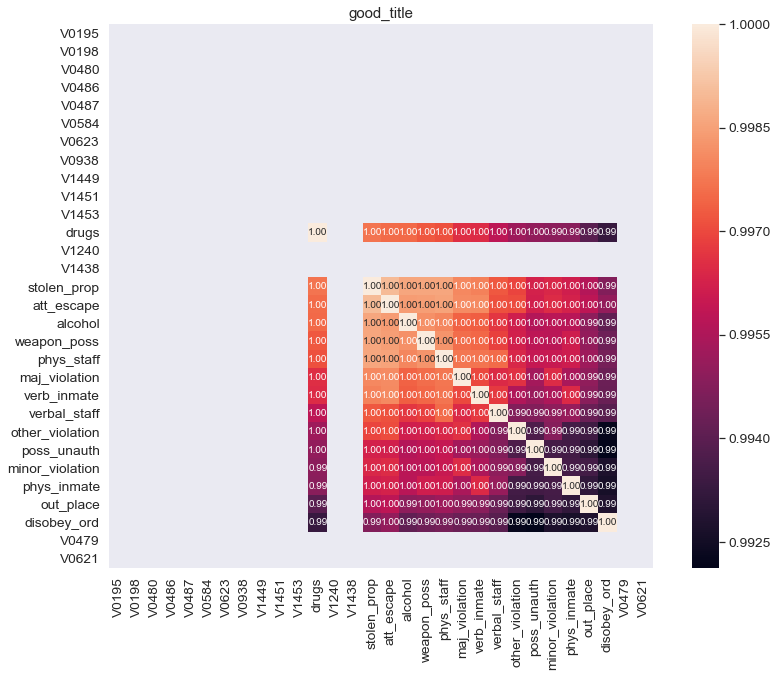

In [39]:
heatmap(df, 30, 'drugs', 'good_title')

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5,
                           bootstrap=True, 
                            verbose=1, n_jobs=-1, random_state=seed)

In [40]:
'drugs' in df.columns

True

In [41]:
for x in df.columns:
    print(x)

Index(['V0195', 'V0198', 'V0480', 'V0486', 'V0487', 'V0584', 'V0623', 'V0938',
       'V1449', 'V1451', 'V1453', 'drugs', 'V1240', 'V1438', 'stolen_prop',
       'att_escape', 'alcohol', 'weapon_poss', 'phys_staff', 'maj_violation',
       'verb_inmate', 'verbal_staff', 'other_violation', 'poss_unauth',
       'minor_violation', 'phys_inmate', 'out_place', 'disobey_ord', 'V0479',
       'V0621'],
      dtype='object')
V0001
V0002
V0003
V0004
V0005
V0006
V0007
V0008
V0009
V0013
V0014
V0015
V0016
V0017
V0018
V0019
V0020
V0021
V0022
V0023
V0024
V0025
V0026
V0027
V0028
V0029
V0030
V0031
V0032
V0033
V0034
V0035
V0036
V0037
V0038
V0039
V0040
V0041
V0042
V0043
V0044
V0045
V0046
V0049
V0051
V0052
V0055
V0057
V0058
V0059
V0060
V0061
V0062
V0063
V0064
V0065
V0066
V0067
V0068
V0069
V0070
V0071
V0072
V0073
V0074
V0075
V0076
V0077
V0078
V0079
V0080
V0081
V0082
V0083
V0084
V0085
V0086
V0087
V0088
V0089
V0090
V0091
V0092
V0093
V0094
V0095
V0096
V0097
V0098
V0099
V0100
V0101
V0102
V0103
V0104
V0105
V0

V1857
V1858
V1859
V1860
V1861
V1862
V1863
V1864
V1865
V1866
V1867
V1868
V1869
V1870
V1871
V1872
V1873
V1874
V1875
V1876
V1877
V1878
V1879
V1880
V1881
V1882
V1883
V1884
V1885
V1886
V1887
V1888
V1889
V1890
V1891
V1892
V1893
V1894
V1895
V1896
V1897
V1898
V1899
V1900
V1901
V1902
V1903
V1904
V1905
V1906
V1907
V1908
V1909
V1910
V1911
V1912
V1913
V1914
V1915
V1916
V1917
V1918
V1919
V1920
V1921
V1922
V1923
V1924
V1925
V1926
V1927
V1928
V1929
V1930
V1931
V1932
V1933
V1934
V1935
V1936
V1937
V1938
V1939
V1940
V1941
V1942
V1943
V1944
V1945
V1946
V1947
V1948
V1949
V1950
V1951
V1952
V1953
V1954
V1955
V1956
V1957
V1958
V1959
V1960
V1961
V1962
V1963
V1964
V1965
V1966
V1967
V1968
V1969
V1970
V1971
V1972
V1973
V1974
V1975
V1976
V1977
V1978
V1979
V1980
V1981
V1982
V1983
V1984
V1985
V1986
V1987
V1988
V1989
V1990
V1991
V1992
V1993
V1994
V1995
V1996
V1997
V1998
V1999
V2000
V2001
V2002
V2003
V2004
V2005
V2006
V2007
V2008
V2009
V2010
V2011
V2012
V2013
V2014
V2015
V2016
V2017
V2018
V2019
V2020
V2021
V2022
V202

CH_NUMCAR5
CH_CRIM_HISTORY


In [147]:
to_replace = [9999999.98, 9999998.00, 9999997.00, 9.980000e+059]
X.replace(to_replace, np.nan, inplace=True)
pd.get_dummies(X.fillna(0)).max().sort_values(ascending=False)

CH_EXPECTEDTIMEMTH               5.555555e+06
V0911                            1.000000e+06
V0831                            9.000000e+05
V0986                            1.000000e+05
V2974                            1.000000e+05
V0001                            1.940100e+04
V0906                            1.700000e+04
CS_SENTENCEMTH                   1.000000e+04
V2628                            1.000000e+04
V2726                            1.000000e+04
V2720                            1.000000e+04
V2721                            1.000000e+04
V2722                            1.000000e+04
V2723                            1.000000e+04
V2724                            1.000000e+04
V2725                            1.000000e+04
V2727                            1.000000e+04
V2735                            1.000000e+04
V2728                            1.000000e+04
V2729                            1.000000e+04
V2730                            1.000000e+04
V2731                            1

We will run the data through a random forest and use the importances to determine which pf the 3200 variables are worth looking at. 

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25000, criterion='gini', max_depth=20,
                            bootstrap=True, max_features='auto',
                            verbose=1, n_jobs=-1, random_state=seed)

In [199]:
with pd.option_context('mode.use_inf_as_null', True):
    rf.fit(pd.get_dummies(X.drop(columns='V2605').fillna(0)),violator.fillna(0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks  

In [200]:
import operator
sorted_x = sorted({x:y for x, y in zip(X.columns, rf.feature_importances_)}.items(), key=operator.itemgetter(1))
for x, y in sorted_x[:100:-1]:
    print(x, ':', y)

V2515 : 0.12881904368506877
V2529 : 0.11962836099038825
V2562 : 0.10102103332003329
V2517 : 0.05158023970077524
V2557 : 0.028244305802074873
V2548 : 0.022825568572599608
V2553 : 0.01222799189170524
V2516 : 0.009052809991972806
V2550 : 0.008430317501835798
V2977 : 0.0071533223476876375
V2946 : 0.006814944168344889
V0715 : 0.005947136347147223
CO_STATUSTME : 0.005527540270586576
V2555 : 0.0052681177966627316
V2975 : 0.005013114618233342
V2301 : 0.004978713759689326
V2302 : 0.004956428813249699
V2943 : 0.004847260455315056
V2558 : 0.004434534680191747
CH_INCARCERATION : 0.003957074223482927
V2967 : 0.003485342227993471
V2950 : 0.0033980991615397945
V2290 : 0.003391443501914847
V2298 : 0.003308383014047546
V0131 : 0.002612608475583067
V2594 : 0.0025320802929300937
V2497 : 0.0025181199534880703
V2925 : 0.0024689273981620724
DRUG_DEPENDENCE : 0.0020874358965477214
V0001 : 0.0020578718403427973
DRUG_OTHERDRUG_TMEINF : 0.0019227442320617165
DRUG_HALLU_TMEINF : 0.0018719989636734949
V2981 : 0.0

V2169 : 0.0002767748234459012
V2815 : 0.00027599639332883774
CH_PROBATION : 0.0002754839659990295
V2441 : 0.00027543043280640954
DRUG_DEPENDENCE_TIME_SPENT : 0.00027446233562821527
V2828 : 0.0002740702508431653
V2391 : 0.0002739079951750664
DRUG_CURRENTOFFENSE_DRUGS : 0.00027344441653476807
CH_NUMCAR : 0.0002733282349553288
V0733 : 0.0002731437978033042
V2393 : 0.00027312606310753217
CS_INCDJ : 0.0002726629177832962
V2171 : 0.00027141564880601125
V2817 : 0.00027135215264503527
V2176 : 0.00027053794284658173
V2775 : 0.0002702316770142567
V2638 : 0.0002699600187589447
V2822 : 0.00026957020953988876
SES_INCOMEEDUCMTH : 0.00026950220477653326
V2175 : 0.0002691349475369823
V2376 : 0.00026908131082718653
V1854 : 0.0002689846846281462
V2177 : 0.000268952218855532
CH_NUMCAR1 : 0.000268667863491813
V2162 : 0.00026852221604076496
SES_PERP_SEX_FRIEND : 0.00026831868909360485
V2392 : 0.0002678845983331598
V2805 : 0.0002677367154957083
V1768 : 0.0002673130066713997
V2488 : 0.00026682753773498385
V2

DRUG_NUMPOS_CAGE_COLLAPSED : 0.00014841775634093018
DRUG_PGMPRBDRUG : 0.00014837539913483753
V2045 : 0.00014814018082071414
V2029 : 0.00014804647972366169
CS_DRUG_TREATMENT : 0.000148014538204933
V1731 : 0.00014795716966010703
V0007 : 0.00014746245576825845
V1358 : 0.00014737754370700408
V1975 : 0.00014731932781174664
DRUG_TRT_DETOX_INC : 0.00014722817948019162
IC_MANYVICT_HISPANIC_OVERALL : 0.00014702438754884097
V2418 : 0.00014697011625562642
V1260 : 0.0001468945623503632
V2219 : 0.0001468097895601527
V0051 : 0.0001466481373022698
V2043 : 0.00014657132236254913
V2091 : 0.00014646169907768088
V2186 : 0.00014629623191606133
DRUG_WORKTROUBLE_ALC : 0.00014611322348838837
V2187 : 0.00014605440771231056
V1795 : 0.0001460523677211681
DRUG_GUILITY_ALC : 0.00014601590106476324
DRUG_ARRESTED_ALC : 0.00014597925110131278
V1785 : 0.00014597916375365318
SES_PERP_PHYSSEX_FAMILY : 0.00014590300284369074
DRUG_DROVE_ALCDRUG : 0.00014570739394292425
V0082 : 0.0001456530361857237
V2042 : 0.000145365654

V0735 : 8.926490427109123e-05
V0405 : 8.923575518016479e-05
V0313 : 8.921052853342637e-05
SES_ANY_CHILDREN : 8.91325277484256e-05
V2354 : 8.911774322333931e-05
V2922 : 8.909468721605533e-05
V0722 : 8.906427068444633e-05
V1920 : 8.899469387332137e-05
DRUG_ANYMTH : 8.896893827184916e-05
V1121 : 8.864126399850999e-05
V2195 : 8.851219647644793e-05
V0780 : 8.848259021062996e-05
V0451 : 8.843093985452052e-05
DRUG_COCRKTME : 8.842904741023659e-05
V1110 : 8.825822778687725e-05
V2259 : 8.821877262024952e-05
V0404 : 8.799284761136911e-05
DRUG_INHAL_CB : 8.790409096445887e-05
V1181 : 8.762418957624305e-05
V2067 : 8.749951937081291e-05
DRUG_DEPENDENCE_CONTINUED_USE : 8.74456331550623e-05
V0825 : 8.741621397982788e-05
V0640 : 8.7378420145178e-05
V2089 : 8.72492144959789e-05
V2049 : 8.710279268097107e-05
V2918 : 8.70816570608825e-05
V1087 : 8.707806740004289e-05
V0692 : 8.700520930697046e-05
V2578 : 8.681189647608665e-05
V1282 : 8.676547051636261e-05
DRUG_PGMINC : 8.661217768321867e-05
DRUG_STIMTME 

V2465 : 3.5587536819012457e-05
V0705 : 3.5414410833603496e-05
V1096 : 3.5241445322028083e-05
V0895 : 3.5095911618871207e-05
V0026 : 3.50198563904174e-05
V2335 : 3.489549965197535e-05
V0841 : 3.483473724754781e-05
V1303 : 3.479905431949958e-05
V1472 : 3.4643001197184604e-05
V2569 : 3.4639467609045626e-05
V1535 : 3.4607501388189114e-05
V0139 : 3.456247327849891e-05
V0813 : 3.455714599491774e-05
DRUG_DEPENDENCE_SYMPTOMS_CAT : 3.440918846644995e-05
V0280 : 3.42564759069509e-05
V1228 : 3.423765698451226e-05
V0712 : 3.41686103204569e-05
V0673 : 3.4163130542263697e-05
V1213 : 3.406580163731282e-05
V1095 : 3.4064570261833304e-05
V2245 : 3.393618919067571e-05
V0412 : 3.3911749035362775e-05
V1669 : 3.388641966048476e-05
V1474 : 3.3558019404387324e-05
V0986 : 3.348721265707311e-05
V2246 : 3.3437118948576126e-05
CH_CRIM_HISTORY : 3.338728901436795e-05
V2117 : 3.325855784943419e-05
V1919 : 3.320056587638743e-05
V1837 : 3.307934586415675e-05
V1819 : 3.3028376166057047e-05
V1047 : 3.292761859245727e-

V1353 : 8.718268366711647e-06
V2461 : 8.707175437538113e-06
V1805 : 8.68103557289985e-06
V1387 : 8.573333494706186e-06
V2322 : 8.55887091756197e-06
V0354 : 8.558675665495167e-06
V0911 : 8.530518741696462e-06
V1272 : 8.50653834894448e-06
V0523 : 8.448767035640437e-06
V0088 : 8.406583381916861e-06
V0353 : 8.355925993002417e-06
V0379 : 8.2681053547682e-06
V0143 : 8.17271449785071e-06
V0535 : 8.1562376511123e-06
V0235 : 7.974439752323208e-06
V0266 : 7.96730311034294e-06
V1354 : 7.96012242173392e-06
V2139 : 7.912185773701088e-06
V1490 : 7.902017318475343e-06
V0991 : 7.875457893014817e-06
V0163 : 7.874827354953822e-06
V0526 : 7.83656430688396e-06
V0377 : 7.83565996661348e-06
V1956 : 7.788342095101327e-06
V1235 : 7.780349888005393e-06
V1525 : 7.61273764910051e-06
V0278 : 7.597957850293752e-06
V0914 : 7.5802240436020566e-06
V0366 : 7.501767794669376e-06
V0703 : 7.46766014336257e-06
V2010 : 7.45952607154353e-06
V0560 : 7.456738504923309e-06
V0162 : 7.303208920449929e-06
V0567 : 7.30049299648901

V0249 : 3.3161806236898265e-07
V1254 : 3.189877862780487e-07
V1401 : 3.1460688307305586e-07
V0910 : 2.998976771538955e-07
V0532 : 2.8695137563955897e-07
V0974 : 2.8509991282296904e-07
V1377 : 2.833201335842812e-07
V1376 : 2.820873335524623e-07
V1580 : 2.753018988179534e-07
V0534 : 2.7233301156017716e-07
V0328 : 2.720690479636751e-07
V1471 : 2.4800732081780187e-07
V1468 : 2.474053649324658e-07
V1615 : 2.4282694292913467e-07
V0511 : 2.3768866944032986e-07
V0592 : 2.2002295540812788e-07
V0759 : 2.1838822811784557e-07
V0487 : 2.1232720585429805e-07
V0541 : 2.0033115758385948e-07
V0965 : 1.9991887299909256e-07
V0542 : 1.9655263510768494e-07
V1470 : 1.943766317783744e-07
V1378 : 1.8928155472156448e-07
V1467 : 1.8784207204257515e-07
V1643 : 1.8595372874817694e-07


In [1]:
X['V0715']

NameError: name 'X' is not defined

In [155]:
pd.get_dummies(X).shape

(18185, 3286)

In [158]:
# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# import lightgbm as lgb

In [169]:
logit = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1500).fit(np.array(pd.get_dummies(X).fillna(0), dtype='float64'), violator)
logit.predict(pd.get_dummies(X).fillna(0))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [162]:
np.array(pd.get_dummies(X.fillna(0))).dtype

dtype('float64')

In [168]:
np.array(pd.get_dummies(X.fillna(0))).any()

True

In [173]:
np.isinf(np.array(pd.get_dummies(X).fillna(0), dtype='float64')).any()

False

In [175]:
pd.get_dummies(X).fillna(0).isnull().any().any()

False

In [178]:
df.select_dtypes('object')

,V1057,V1061,V2605
0,TX,99,999999999999999999999
1,NY,99,999999999999999999999
2,NY,FL,999999999999999999999
3,NJ,99,999999999999999999999
4,TX,99,999999999999999999999
5,NY,FL,999999999999999999999
6,SC,99,999999999999999999999
7,DC,99,999999999999999999999
8,VA,DC,999999999999999999999
9,PA,PA,999999999999999999999


In [183]:
X.select_dtypes('object')

,V1057,V1061,V2605
0,TX,NaN,999999999999999999999
1,NY,NaN,999999999999999999999
2,NY,FL,999999999999999999999
3,NJ,NaN,999999999999999999999
4,TX,NaN,999999999999999999999
5,NY,FL,999999999999999999999
6,SC,NaN,999999999999999999999
7,DC,NaN,999999999999999999999
8,VA,DC,999999999999999999999
9,PA,PA,999999999999999999999
